# PROYECTO: COMPRESIÓN DE IMÁGENES USANDO K-MEANS CLUSTERING
## Descripción: Este proyecto reduce el número de colores en una imagen usando el algoritmo K-means y visualiza el análisis completo.


# 1. IMPORTACIÓN DE LIBRERÍAS

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from PIL import Image
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Configuración de matplotlib
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


# 2. CARGA DE LA IMAGEN


In [36]:
# Ruta de la imagen (modifica esta ruta con tu imagen)
image_path = 'img-porsche.jpg'  # Cambia esto por tu imagen

# Cargar imagen
original_image = Image.open(image_path)
original_image = original_image.convert('RGB')

# Información básica
width, height = original_image.size
print(f"📊 INFORMACIÓN DE LA IMAGEN")
print(f"   Dimensiones: {width} x {height} píxeles")
print(f"   Píxeles totales: {width * height:,}")
print(f"   Modo: {original_image.mode}")

📊 INFORMACIÓN DE LA IMAGEN
   Dimensiones: 4808 x 6925 píxeles
   Píxeles totales: 33,295,400
   Modo: RGB


# 3. CONVERSIÓN A ARRAY Y ANÁLISIS INICIAL

In [37]:
# Convertir imagen a array numpy
img_array = np.array(original_image)
print(f"   Shape del array: {img_array.shape}")
print(f"   Tipo de datos: {img_array.dtype}")
print(f"   Tamaño en memoria: {img_array.nbytes / 1024:.2f} KB")

# Reshapear para obtener lista de píxeles [n_pixels, 3]
original_pixels = img_array.reshape(-1, 3)
print(f"\n   Píxeles reshape: {original_pixels.shape}")

   Shape del array: (6925, 4808, 3)
   Tipo de datos: uint8
   Tamaño en memoria: 97545.12 KB

   Píxeles reshape: (33295400, 3)


# 4. ANÁLISIS DE COLORES ORIGINALES

In [39]:
# Obtener colores únicos
unique_colors_original = np.unique(original_pixels, axis=0)
n_unique_original = len(unique_colors_original)

print(f"\n🎨 ANÁLISIS DE COLORES - IMAGEN ORIGINAL")
print(f"   Colores únicos: {n_unique_original:,}")
print(f"   Total de píxeles: {len(original_pixels):,}")


🎨 ANÁLISIS DE COLORES - IMAGEN ORIGINAL
   Colores únicos: 249,803
   Total de píxeles: 33,295,400


# 5. VISUALIZACIÓN DE LA IMAGEN ORIGINAL

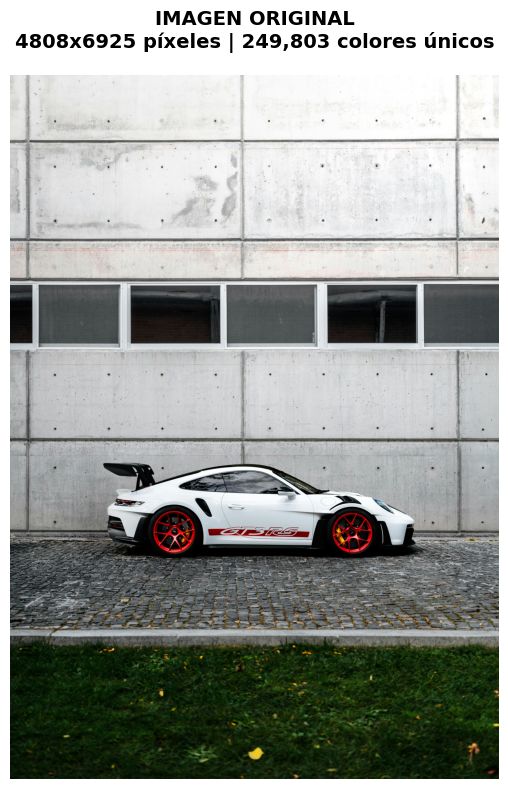

In [40]:
plt.figure(figsize=(10, 8))
plt.imshow(original_image)
plt.axis('off')
plt.title(f'IMAGEN ORIGINAL\n{width}x{height} píxeles | {n_unique_original:,} colores únicos',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 6. NUBE DE PUNTOS 3D - COLORES ORIGINALES


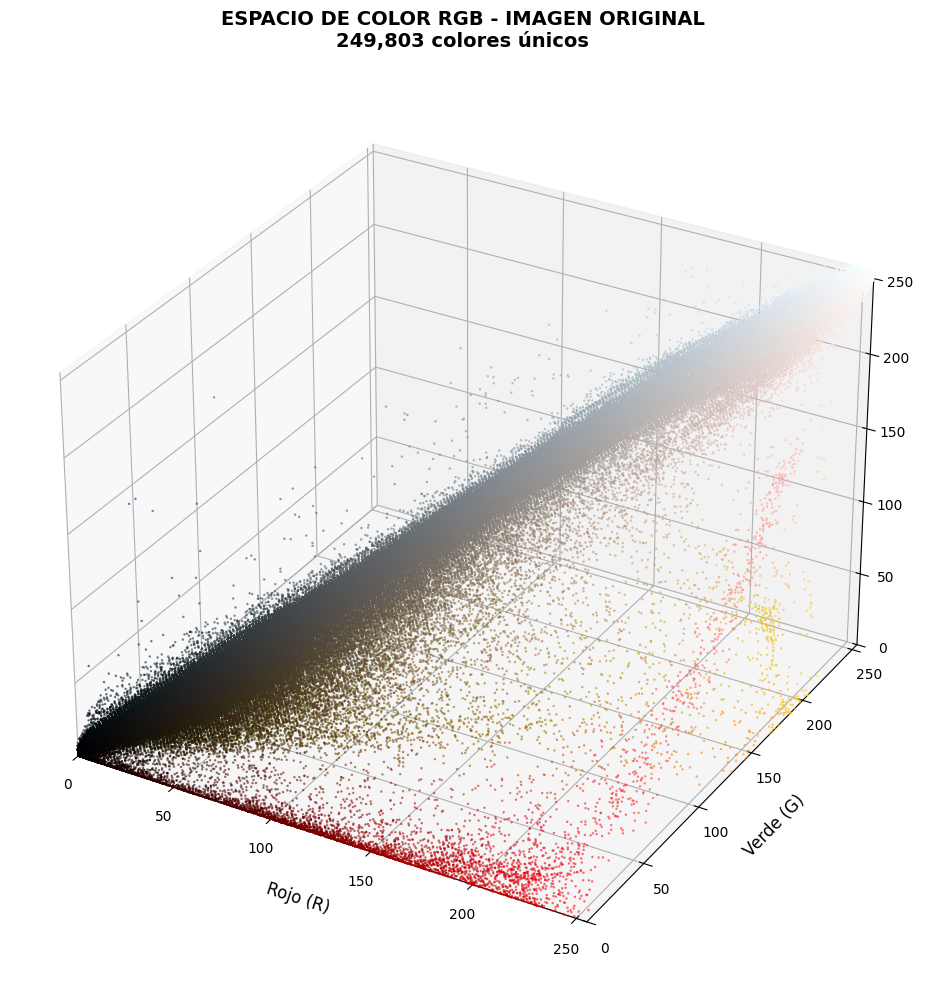

In [41]:
# Muestrear píxeles para visualización (para evitar sobrecarga)
sample_size = 1000000
if len(original_pixels) > sample_size:
    indices = np.random.choice(len(original_pixels), sample_size, replace=False)
    sampled_pixels_original = original_pixels[indices]
else:
    sampled_pixels_original = original_pixels

# Crear visualización 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalizar colores para matplotlib (0-1)
colors_normalized = sampled_pixels_original / 255.0

# Plotear puntos
scatter = ax.scatter(
    sampled_pixels_original[:, 0],  # Canal Rojo
    sampled_pixels_original[:, 1],  # Canal Verde
    sampled_pixels_original[:, 2],  # Canal Azul
    c=colors_normalized,
    s=3,
    alpha=0.6,
    edgecolors='none'
)

ax.set_xlabel('Rojo (R)', fontsize=12, labelpad=10)
ax.set_ylabel('Verde (G)', fontsize=12, labelpad=10)
ax.set_zlabel('Azul (B)', fontsize=12, labelpad=10)
ax.set_title(f'ESPACIO DE COLOR RGB - IMAGEN ORIGINAL\n{n_unique_original:,} colores únicos',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)

plt.tight_layout()
plt.show()

# 7. HISTOGRAMA DE DISTRIBUCIÓN DE COLORES ORIGINALES

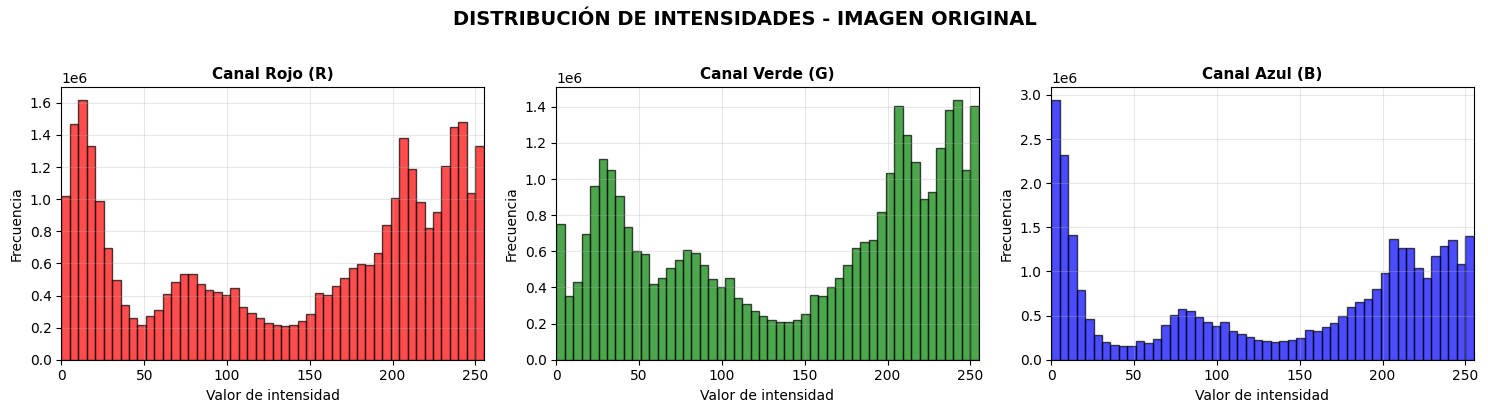

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

colors = ['red', 'green', 'blue']
labels = ['Rojo (R)', 'Verde (G)', 'Azul (B)']

for i, (ax, color, label) in enumerate(zip(axes, colors, labels)):
    ax.hist(original_pixels[:, i], bins=50, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Valor de intensidad', fontsize=10)
    ax.set_ylabel('Frecuencia', fontsize=10)
    ax.set_title(f'Canal {label}', fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 255)

plt.suptitle('DISTRIBUCIÓN DE INTENSIDADES - IMAGEN ORIGINAL',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


# 9. APLICACIÓN DEL ALGORITMO K-MEANS

In [43]:
from sklearn.cluster import MiniBatchKMeans
import time

# Definir número de clusters (colores finales)
n_clusters = 16  # Puedes cambiar este valor

print(f"🔄 APLICANDO K-MEANS CLUSTERING")
print(f"   Número de clusters (K): {n_clusters}")
print(f"   Procesando {len(original_pixels):,} píxeles...")

# Medir tiempo de ejecución
start_time = time.time()

# Aplicar K-means
kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=42,
    batch_size=2048,
    max_iter=100,
    n_init=3
)
labels = kmeans.fit_predict(original_pixels)

# Calcular tiempo transcurrido
elapsed_time = time.time() - start_time

print(f"✓ K-means completado en {elapsed_time:.2f} segundos")
print(f"   Iteraciones realizadas: {kmeans.n_iter_}")
print(f"   Inercia final: {kmeans.inertia_:.2f}")

# Obtener centros (colores representativos)
centers = kmeans.cluster_centers_.astype(int)

print(f"\n🎨 CENTROS DE CLUSTERS (COLORES FINALES):")
for i, center in enumerate(centers):
    hex_color = f'#{center[0]:02x}{center[1]:02x}{center[2]:02x}'
    # Calcular cuántos píxeles pertenecen a este cluster
    pixels_in_cluster = np.sum(labels == i)
    percentage = (pixels_in_cluster / len(labels)) * 100
    print(f"   Cluster {i+1:2d}: RGB{tuple(center)} -> {hex_color} ({percentage:.2f}% de píxeles)")

🔄 APLICANDO K-MEANS CLUSTERING
   Número de clusters (K): 16
   Procesando 33,295,400 píxeles...
✓ K-means completado en 1.71 segundos
   Iteraciones realizadas: 1
   Inercia final: 5167639409.66

🎨 CENTROS DE CLUSTERS (COLORES FINALES):
   Cluster  1: RGB(np.int64(215), np.int64(216), np.int64(216)) -> #d7d8d8 (9.18% de píxeles)
   Cluster  2: RGB(np.int64(32), np.int64(51), np.int64(17)) -> #203311 (5.46% de píxeles)
   Cluster  3: RGB(np.int64(116), np.int64(118), np.int64(116)) -> #747674 (4.23% de píxeles)
   Cluster  4: RGB(np.int64(182), np.int64(185), np.int64(186)) -> #b6b9ba (6.68% de píxeles)
   Cluster  5: RGB(np.int64(72), np.int64(76), np.int64(74)) -> #484c4a (6.07% de píxeles)
   Cluster  6: RGB(np.int64(17), np.int64(32), np.int64(9)) -> #112009 (11.69% de píxeles)
   Cluster  7: RGB(np.int64(250), np.int64(251), np.int64(251)) -> #fafbfb (6.12% de píxeles)
   Cluster  8: RGB(np.int64(201), np.int64(202), np.int64(203)) -> #c9cacb (9.71% de píxeles)
   Cluster  9: RGB(

# 10. CONSTRUCCIÓN DE LA IMAGEN COMPRIMIDA

In [45]:
# Reemplazar cada píxel por su centro correspondiente
compressed_pixels = centers[labels]

# Reshapear de vuelta a imagen
compressed_array = compressed_pixels.reshape(height, width, 3).astype(np.uint8)

# Crear imagen PIL
compressed_image = Image.fromarray(compressed_array)

# Guardo la imagen
compressed_image.save('img-porsche-compress.png', format='PNG', optimize=True)
print("✓ Imagen comprimida guardada como 'img-porsche-compress.png'")

print(f"✓ Imagen comprimida creada")
print(f"   Dimensiones: {compressed_image.size}")
print(f"   Tipo de datos: {compressed_array.dtype}")
print(f"   Tamaño en memoria: {compressed_array.nbytes / 1024:.2f} KB")

✓ Imagen comprimida guardada como 'img-porsche-compress.png'
✓ Imagen comprimida creada
   Dimensiones: (4808, 6925)
   Tipo de datos: uint8
   Tamaño en memoria: 97545.12 KB


# 11. ANÁLISIS DE COLORES COMPRIMIDOS

In [46]:
# Obtener colores únicos de la imagen comprimida
unique_colors_compressed = np.unique(compressed_pixels, axis=0)
n_unique_compressed = len(unique_colors_compressed)

print(f"\n🎨 ANÁLISIS DE COLORES - IMAGEN COMPRIMIDA")
print(f"   Colores únicos: {n_unique_compressed:,}")
print(f"   Total de píxeles: {len(compressed_pixels):,}")

# Calcular reducción
reduction = (1 - n_unique_compressed / n_unique_original) * 100
print(f"\n   📊 RESULTADOS DE COMPRESIÓN:")
print(f"   Colores originales: {n_unique_original:,}")
print(f"   Colores comprimidos: {n_unique_compressed:,}")
print(f"   Reducción de colores: {reduction:.2f}%")


🎨 ANÁLISIS DE COLORES - IMAGEN COMPRIMIDA
   Colores únicos: 16
   Total de píxeles: 33,295,400

   📊 RESULTADOS DE COMPRESIÓN:
   Colores originales: 249,803
   Colores comprimidos: 16
   Reducción de colores: 99.99%


# 12. VISUALIZACIÓN DE LA IMAGEN COMPRIMIDA

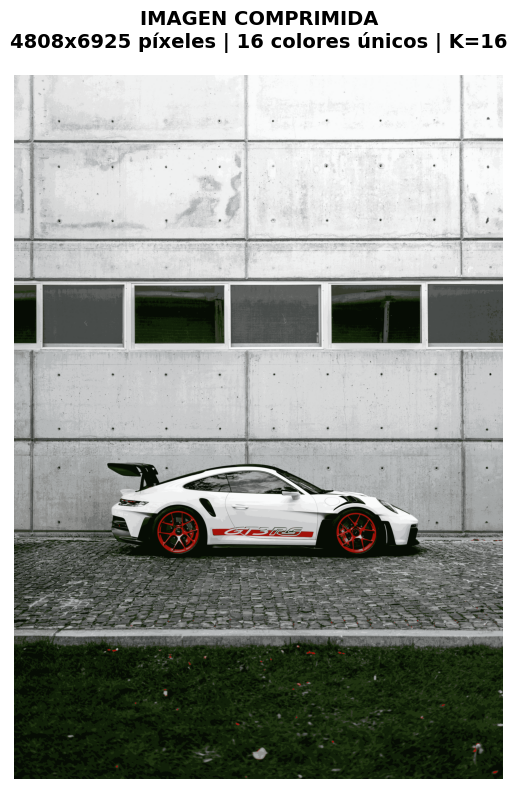

In [47]:
plt.figure(figsize=(10, 8))
plt.imshow(compressed_image)
plt.axis('off')
plt.title(f'IMAGEN COMPRIMIDA\n{width}x{height} píxeles | {n_unique_compressed:,} colores únicos | K={n_clusters}',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# 13. NUBE DE PUNTOS 3D - COLORES COMPRIMIDOS

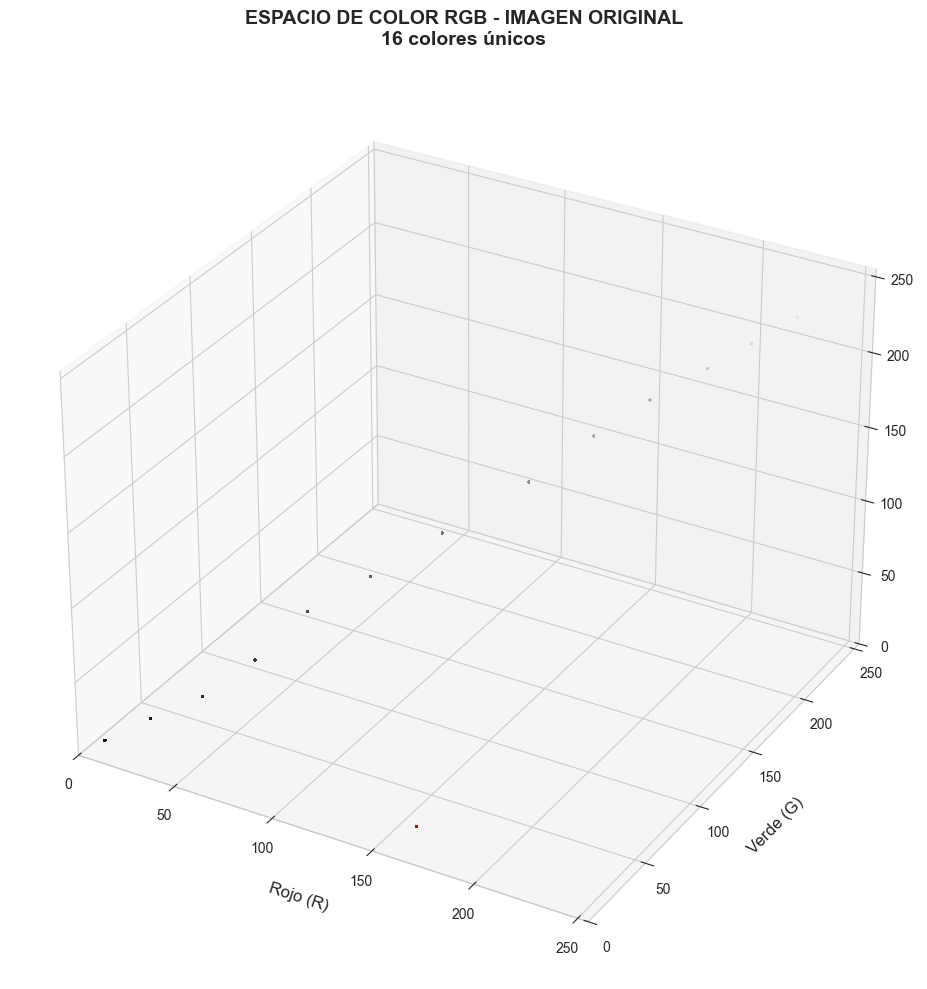

In [49]:
# Muestrear píxeles para visualización (para evitar sobrecarga)
sample_size = 1000000
if len(compressed_pixels) > sample_size:
    indices = np.random.choice(len(compressed_pixels), sample_size, replace=False)
    sampled_compressed_pixels = compressed_pixels[indices]
else:
    sampled_compressed_pixels = compressed_pixels

# Crear visualización 3D
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Normalizar colores para matplotlib (0-1)
colors_normalized = sampled_compressed_pixels / 255.0

# Plotear puntos
scatter = ax.scatter(
    sampled_compressed_pixels[:, 0],  # Canal Rojo
    sampled_compressed_pixels[:, 1],  # Canal Verde
    sampled_compressed_pixels[:, 2],  # Canal Azul
    c=colors_normalized,
    s=3,
    alpha=0.6,
    edgecolors='none'
)

ax.set_xlabel('Rojo (R)', fontsize=12, labelpad=10)
ax.set_ylabel('Verde (G)', fontsize=12, labelpad=10)
ax.set_zlabel('Azul (B)', fontsize=12, labelpad=10)
ax.set_title(f'ESPACIO DE COLOR RGB - IMAGEN ORIGINAL\n{n_unique_compressed:,} colores únicos',
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_zlim(0, 255)

plt.tight_layout()
plt.show()